In [1]:
## First iteration of clutch score formula, not including games played/usage rate restrictions

import pandas as pd

# Load the processed Excel file
file_path = 'NBA_Clutch_Performance_Analysis.xlsx'

# Read the combined data sheet
df = pd.read_excel(file_path, sheet_name='Combined Data')

# Define the formula for calculating performance score
def calculate_performance_score(row, prefix):
    return (
        1.2 * row[f'PTS_{prefix}'] +
        0.5 * row[f'FGM_{prefix}'] -
        0.25 * row[f'FGA_{prefix}'] -
        0.8 * (row[f'FTA_{prefix}'] - row[f'FTM_{prefix}']) +
        0.5 * row[f'OREB_{prefix}'] +
        0.2 * row[f'DREB_{prefix}'] +
        1.2 * row[f'STL_{prefix}'] +
        1.0 * row[f'AST_{prefix}'] +
        1.0 * row[f'BLK_{prefix}'] -
        0.5 * row[f'PF_{prefix}'] -
        1.0 * row[f'TOV_{prefix}']
    )

# Calculate the clutch and general performance scores
df['Performance_Score_Clutch'] = df.apply(lambda row: calculate_performance_score(row, 'Clutch'), axis=1)
df['Performance_Score_General'] = df.apply(lambda row: calculate_performance_score(row, 'General'), axis=1)

# Calculate the clutch score
df['Clutch_Score'] = df['Performance_Score_Clutch'] - df['Performance_Score_General']

# Sort players by clutch score in descending order
df_sorted = df.sort_values(by='Clutch_Score', ascending=False)

# Display the top 20 players with the highest clutch score
top_20_players = df_sorted[['Player', 'Clutch_Score']].head(20)
print(top_20_players)

# Optionally, save the top 20 players to a new Excel file
top_20_players.to_excel('Top_20_Clutch_Players.xlsx', index=False)

print("Top 20 clutch players saved to 'Top_20_Clutch_Players.xlsx'.")


FileNotFoundError: [Errno 2] No such file or directory: 'NBA_Clutch_Performance_Analysis.xlsx'

In [2]:
# Adding Requirements (>50GP_R, >10GP_C, >15%USG (regular and clutch)

In [25]:
import pandas as pd

# Load the processed Excel file
file_path = 'NBA_Clutch_Performance_Analysis.xlsx'

# Read the combined data sheet
df = pd.read_excel(file_path, sheet_name='Combined Data')

# Define the formula for calculating performance score
def calculate_performance_score(row, prefix):
    return (
        1.2 * row[f'PTS_{prefix}'] +
        0.5 * row[f'FGM_{prefix}'] -
        0.25 * row[f'FGA_{prefix}'] -
        0.8 * (row[f'FTA_{prefix}'] - row[f'FTM_{prefix}']) +
        0.5 * row[f'OREB_{prefix}'] +
        0.2 * row[f'DREB_{prefix}'] +
        1.2 * row[f'STL_{prefix}'] +
        1.0 * row[f'AST_{prefix}'] +
        1.0 * row[f'BLK_{prefix}'] -
        0.5 * row[f'PF_{prefix}'] -
        1.0 * row[f'TOV_{prefix}']
    )

# Calculate performance scores for general and clutch stats
df['Performance_Score_Clutch'] = df.apply(lambda row: calculate_performance_score(row, 'Clutch'), axis=1)
df['Performance_Score_General'] = df.apply(lambda row: calculate_performance_score(row, 'General'), axis=1)

# Calculate clutch score
df['Clutch_Score'] = df['Performance_Score_Clutch'] - df['Performance_Score_General']

# Apply filtering conditions based on correct column names
filtered_df = df[
    (df['GP_General_Trad'] >= 50) &   # At least 50 games played in general time
    (df['GP_Clutch_Trad'] >= 10) &    # At least 10 games played in clutch time
    (df['USG%_General'] > 15) &       # USG% greater than 10% in general time
    (df['USG%_Clutch'] > 15)          # USG% greater than 10% in clutch time
]

# Sort by clutch score in descending order
df_sorted = filtered_df.sort_values(by='Clutch_Score', ascending=False)

# Display the top 20 players with the highest clutch score
top_20_players = df_sorted[['Player', 'Clutch_Score', 'GP_General_Trad', 'GP_Clutch_Trad', 'USG%_General', 'USG%_Clutch']].head(20)
print(top_20_players)

# Save the top 20 players to a new Excel file
top_20_players.to_excel('Top_20_Clutch_Players_Filtered.xlsx', index=False)

print("Top 20 clutch players with filters applied saved to 'Top_20_Clutch_Players_Filtered.xlsx'.")


                      Player  Clutch_Score  GP_General_Trad  GP_Clutch_Trad  \
5              Stephen Curry       0.25685               74              43   
162              Buddy Hield       0.18075               84              29   
77           Jordan Clarkson       0.15210               55              19   
41             DeMar DeRozan       0.14710               79              40   
55         Tyrese Haliburton       0.14610               69              28   
56              Terry Rozier       0.14280               61              29   
34            Damian Lillard       0.13600               73              37   
13              Kyrie Irving       0.13225               58              20   
31                Trae Young       0.11470               54              31   
207           Malaki Branham       0.10215               75              14   
2    Shai Gilgeous-Alexander       0.09925               75              34   
213            Dillon Brooks       0.09340          

In [26]:
# Displaying 'Clutch Score' with USG% in regular and clutch time.

# Select only relevant columns for output
top_20_players = df_sorted[['Player', 'Team_General', 'Clutch_Score', 'USG%_General', 'USG%_Clutch']].head(20)

# Display the top 20 players with the highest clutch score
print(top_20_players)

# Save the filtered results to an Excel file
top_20_players.to_excel('Top_20_Clutch_Players_Filtered.xlsx', index=False)

print("Top 20 clutch players saved to 'Top_20_Clutch_Players_Filtered.xlsx'.")


                      Player Team_General  Clutch_Score  USG%_General  \
5              Stephen Curry          GSW       0.25685          30.2   
162              Buddy Hield          PHI       0.18075          18.6   
77           Jordan Clarkson          UTA       0.15210          25.5   
41             DeMar DeRozan          CHI       0.14710          25.2   
55         Tyrese Haliburton          IND       0.14610          23.9   
56              Terry Rozier          MIA       0.14280          25.3   
34            Damian Lillard          MIL       0.13600          27.4   
13              Kyrie Irving          DAL       0.13225          27.4   
31                Trae Young          ATL       0.11470          28.9   
207           Malaki Branham          SAS       0.10215          19.2   
2    Shai Gilgeous-Alexander          OKC       0.09925          31.7   
213            Dillon Brooks          HOU       0.09340          17.6   
237           Gordon Hayward          OKC       0.0

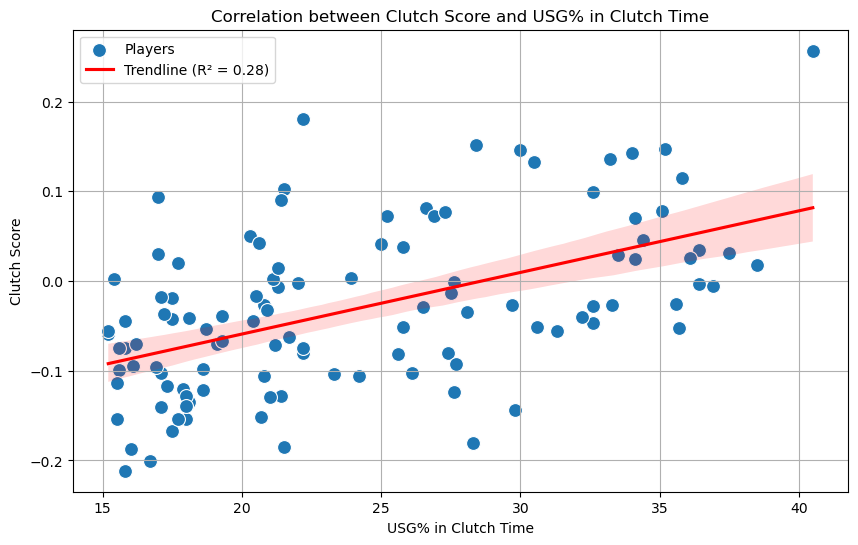

In [29]:
# Checking for correlation between Clutch Time USG% and Clutch Score

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

# Load the processed Excel file
file_path = 'NBA_Clutch_Performance_Analysis.xlsx'
df = pd.read_excel(file_path, sheet_name='Combined Data')

# Calculate performance scores for general and clutch stats
df['Performance_Score_Clutch'] = (
    1.2 * df['PTS_Clutch'] +
    0.5 * df['FGM_Clutch'] -
    0.25 * df['FGA_Clutch'] -
    0.8 * (df['FTA_Clutch'] - df['FTM_Clutch']) +
    0.5 * df['OREB_Clutch'] +
    0.2 * df['DREB_Clutch'] +
    1.2 * df['STL_Clutch'] +
    1.0 * df['AST_Clutch'] +
    1.0 * df['BLK_Clutch'] -
    0.5 * df['PF_Clutch'] -
    1.0 * df['TOV_Clutch']
)

df['Performance_Score_General'] = (
    1.2 * df['PTS_General'] +
    0.5 * df['FGM_General'] -
    0.25 * df['FGA_General'] -
    0.8 * (df['FTA_General'] - df['FTM_General']) +
    0.5 * df['OREB_General'] +
    0.2 * df['DREB_General'] +
    1.2 * df['STL_General'] +
    1.0 * df['AST_General'] +
    1.0 * df['BLK_General'] -
    0.5 * df['PF_General'] -
    1.0 * df['TOV_General']
)

# Calculate clutch score
df['Clutch_Score'] = df['Performance_Score_Clutch'] - df['Performance_Score_General']

# Apply filtering conditions
filtered_df = df[
    (df['GP_General_Trad'] >= 50) &   # At least 50 games played in general time
    (df['GP_Clutch_Trad'] >= 10) &    # At least 10 games played in clutch time
    (df['USG%_General'] > 15) &       # USG% greater than 10% in general time
    (df['USG%_Clutch'] > 15)          # USG% greater than 10% in clutch time
]

# Calculate correlation statistics
x = filtered_df['USG%_Clutch']
y = filtered_df['Clutch_Score']
slope, intercept, r_value, p_value, std_err = linregress(x, y)
r_squared = r_value ** 2  # R-squared value

# Scatter plot for Clutch Score vs USG% in Clutch Time
plt.figure(figsize=(10, 6))
sns.scatterplot(x=x, y=y, edgecolor='w', s=100, label="Players")

# Add trendline
sns.regplot(x=x, y=y, scatter=False, color='red', label=f"Trendline (R² = {r_squared:.2f})")

# Labeling the plot
plt.title("Correlation between Clutch Score and USG% in Clutch Time")
plt.xlabel("USG% in Clutch Time")
plt.ylabel("Clutch Score")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


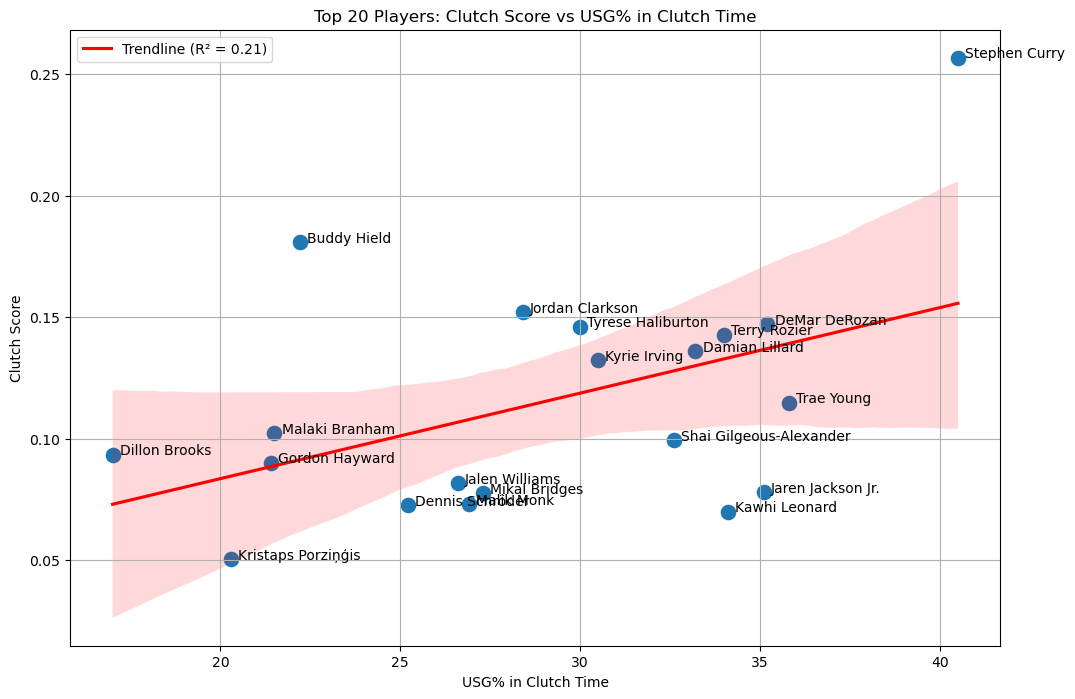

In [6]:
# Checking for Clutch Performance and Clutch USG% correlation for top performers

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

# Load the processed Excel file
file_path = 'NBA_Clutch_Performance_Analysis.xlsx'
df = pd.read_excel(file_path, sheet_name='Combined Data')

# Calculate performance scores for general and clutch stats
df['Performance_Score_Clutch'] = (
    1.2 * df['PTS_Clutch'] +
    0.5 * df['FGM_Clutch'] -
    0.25 * df['FGA_Clutch'] -
    0.8 * (df['FTA_Clutch'] - df['FTM_Clutch']) +
    0.5 * df['OREB_Clutch'] +
    0.2 * df['DREB_Clutch'] +
    1.2 * df['STL_Clutch'] +
    1.0 * df['AST_Clutch'] +
    1.0 * df['BLK_Clutch'] -
    0.5 * df['PF_Clutch'] -
    1.0 * df['TOV_Clutch']
)

df['Performance_Score_General'] = (
    1.2 * df['PTS_General'] +
    0.5 * df['FGM_General'] -
    0.25 * df['FGA_General'] -
    0.8 * (df['FTA_General'] - df['FTM_General']) +
    0.5 * df['OREB_General'] +
    0.2 * df['DREB_General'] +
    1.2 * df['STL_General'] +
    1.0 * df['AST_General'] +
    1.0 * df['BLK_General'] -
    0.5 * df['PF_General'] -
    1.0 * df['TOV_General']
)

# Calculate clutch score
df['Clutch_Score'] = df['Performance_Score_Clutch'] - df['Performance_Score_General']

# Apply filtering conditions
filtered_df = df[
    (df['GP_General_Trad'] >= 50) &   # At least 50 games played in general time
    (df['GP_Clutch_Trad'] >= 10) &    # At least 10 games played in clutch time
    (df['USG%_General'] > 15) &       # USG% greater than 10% in general time
    (df['USG%_Clutch'] > 15)          # USG% greater than 10% in clutch time
]

# Select the top 20 players based on clutch score
top_20_df = filtered_df.nlargest(20, 'Clutch_Score')

# Calculate correlation statistics for top 20
x_top = top_20_df['USG%_Clutch']
y_top = top_20_df['Clutch_Score']
slope, intercept, r_value, p_value, std_err = linregress(x_top, y_top)
r_squared_top = r_value ** 2  # R-squared value

# Scatter plot for Clutch Score vs USG% in Clutch Time for top 20 players
plt.figure(figsize=(12, 8))
sns.scatterplot(x=top_20_df['USG%_Clutch'], y=top_20_df['Clutch_Score'], edgecolor='w', s=150)

# Add player names next to each point
for i, row in top_20_df.iterrows():
    plt.text(row['USG%_Clutch'] + 0.2, row['Clutch_Score'], row['Player'], fontsize=10)

# Add trendline for top 20 players
sns.regplot(x=x_top, y=y_top, scatter=False, color='red', label=f"Trendline (R² = {r_squared_top:.2f})")

# Labeling the plot
plt.title("Top 20 Players: Clutch Score vs USG% in Clutch Time")
plt.xlabel("USG% in Clutch Time")
plt.ylabel("Clutch Score")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


In [7]:
## Review how many players have a positive clutch score

import pandas as pd

# Filter and sort players with positive clutch scores
positive_clutch_players = filtered_df[filtered_df['Clutch_Score'] > 0].sort_values(by='Clutch_Score', ascending=False)
negative_clutch_players = filtered_df[filtered_df['Clutch_Score'] < 0].sort_values(by='Clutch_Score', ascending=False)

# Display the counts
print(f"Number of players with positive clutch score: {len(positive_clutch_players)}")
print(f"Number of players with negative clutch score: {len(negative_clutch_players)}")

# Show the players with positive clutch scores sorted
print("\nPlayers with Positive Clutch Score (Sorted Highest to Lowest):")
print(positive_clutch_players[['Player', 'Team_General', 'Clutch_Score']].to_string(index=False))

# Show the players with negative clutch scores sorted
print("\nPlayers with Negative Clutch Score (Sorted Highest to Lowest):")
print(negative_clutch_players[['Player', 'Team_General', 'Clutch_Score']].to_string(index=False))


Number of players with positive clutch score: 36
Number of players with negative clutch score: 75

Players with Positive Clutch Score (Sorted Highest to Lowest):
                 Player Team_General  Clutch_Score
          Stephen Curry          GSW       0.25685
            Buddy Hield          PHI       0.18075
        Jordan Clarkson          UTA       0.15210
          DeMar DeRozan          CHI       0.14710
      Tyrese Haliburton          IND       0.14610
           Terry Rozier          MIA       0.14280
         Damian Lillard          MIL       0.13600
           Kyrie Irving          DAL       0.13225
             Trae Young          ATL       0.11470
         Malaki Branham          SAS       0.10215
Shai Gilgeous-Alexander          OKC       0.09925
          Dillon Brooks          HOU       0.09340
         Gordon Hayward          OKC       0.09000
         Jalen Williams          OKC       0.08160
      Jaren Jackson Jr.          MEM       0.07780
          Mikal Bridge

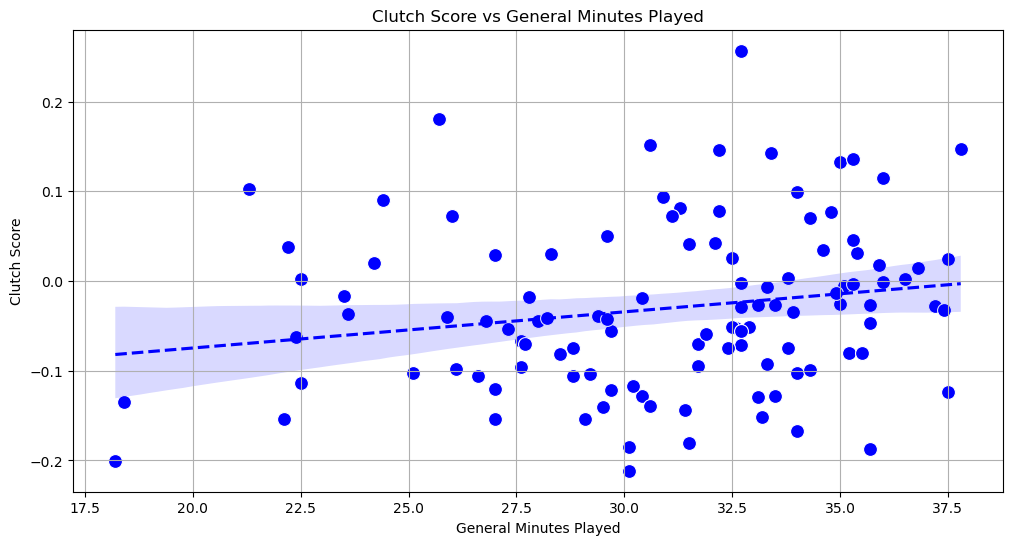

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot Clutch Score vs General Minutes
plt.figure(figsize=(12, 6))
sns.scatterplot(x=filtered_df['MIN_General'], y=filtered_df['Clutch_Score'], color='blue', edgecolor='w', s=100)
sns.regplot(x=filtered_df['MIN_General'], y=filtered_df['Clutch_Score'], scatter=False, color='blue', line_kws={'linestyle': 'dashed'})

# Title and labels
plt.title("Clutch Score vs General Minutes Played")
plt.xlabel("General Minutes Played")
plt.ylabel("Clutch Score")
plt.grid(True)

# Show the plot
plt.show()


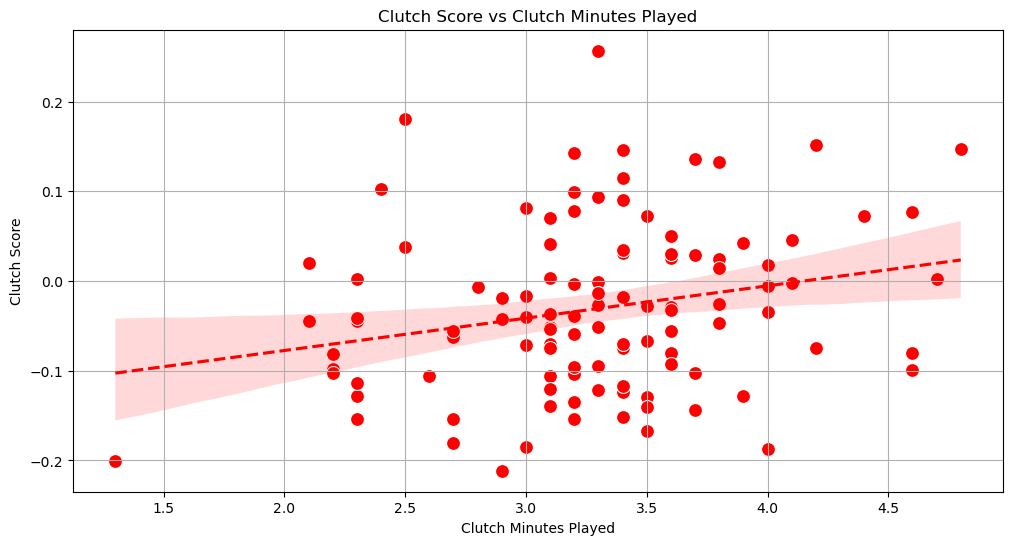

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot Clutch Score vs Clutch Minutes
plt.figure(figsize=(12, 6))
sns.scatterplot(x=filtered_df['MIN_Clutch'], y=filtered_df['Clutch_Score'], color='red', edgecolor='w', s=100)
sns.regplot(x=filtered_df['MIN_Clutch'], y=filtered_df['Clutch_Score'], scatter=False, color='red', line_kws={'linestyle': 'dashed'})

# Title and labels
plt.title("Clutch Score vs Clutch Minutes Played")
plt.xlabel("Clutch Minutes Played")
plt.ylabel("Clutch Score")
plt.grid(True)

# Show the plot
plt.show()


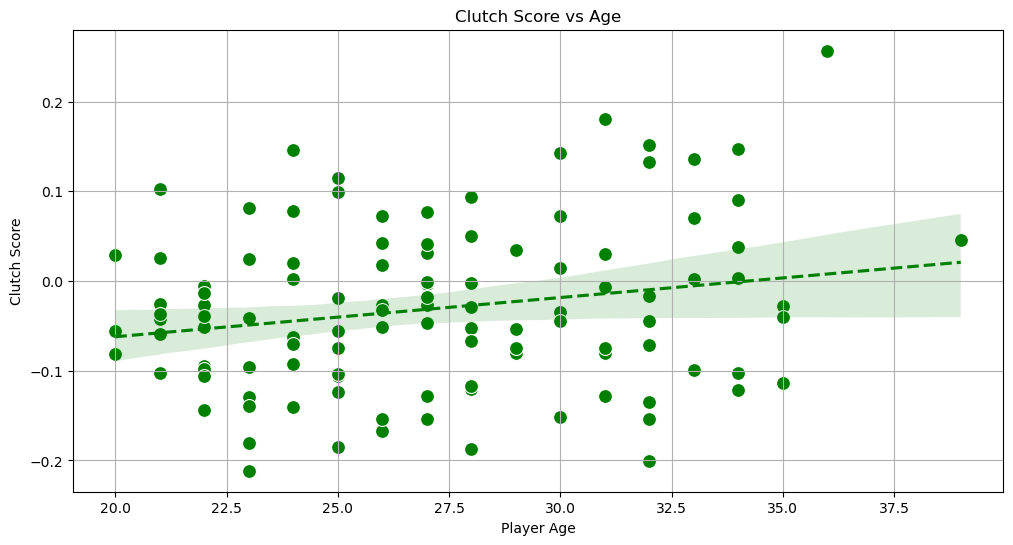

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot for Clutch Score vs Age
plt.figure(figsize=(12, 6))
sns.scatterplot(x=filtered_df['AGE_General'], y=filtered_df['Clutch_Score'], color='green', edgecolor='w', s=100)
sns.regplot(x=filtered_df['AGE_General'], y=filtered_df['Clutch_Score'], scatter=False, color='green', line_kws={'linestyle': 'dashed'})

# Title and labels
plt.title("Clutch Score vs Age")
plt.xlabel("Player Age")
plt.ylabel("Clutch Score")
plt.grid(True)

# Show the plot
plt.show()
